# Setup & Sanity Check
This notebook verifies that your environment works, loads a small sample, and plots a quick figure.

In [ ]:
import sys, platform
import torch, torchvision
print({'python': sys.version.split()[0],
'platform': platform.platform(),
'torch': torch.__version__,
'torch.cuda': torch.cuda.is_available()})


{'python': '3.12.0', 'platform': 'macOS-13.6.9-x86_64-i386-64bit', 'torch': '2.2.2', 'torch.cuda': False}


Found 2192 images in A (ancient drawings)
Found 628 images in B (film-style photos)


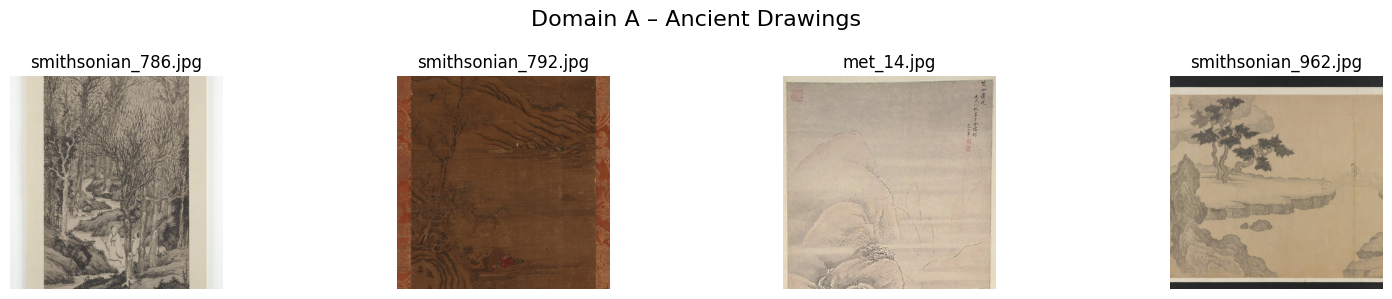

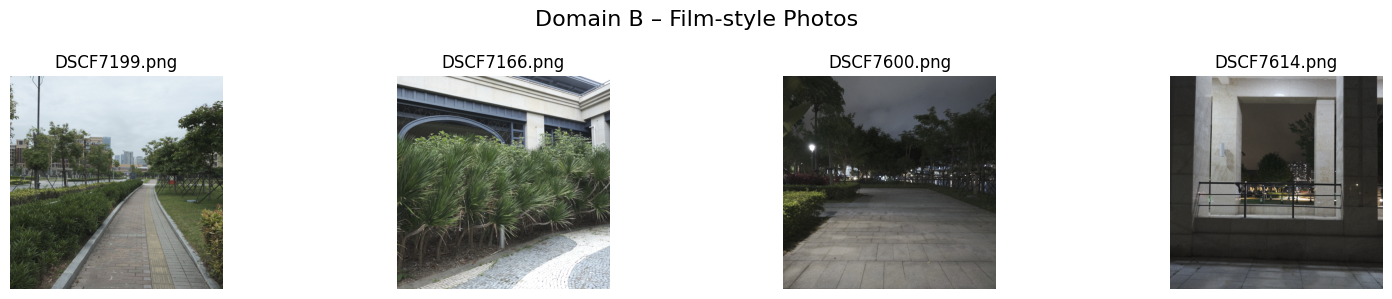

In [14]:

# Load small sample
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import math

rootA = Path('data/A')
rootB = Path('data/B')

def get_images(path):
    patterns = ['*.jpg','*.jpeg','*.png','*.JPG','*.JPEG','*.PNG']
    imgs = []
    for p in patterns:
        imgs += list(path.glob(p))
    if not imgs:
        for p in patterns:
            imgs += list(path.rglob(p))
    return imgs

filesA = get_images(rootA)
filesB = get_images(rootB)

print(f"Found {len(filesA)} images in A (ancient drawings)")
print(f"Found {len(filesB)} images in B (film-style photos)")

if len(filesA) == 0 or len(filesB) == 0:
    raise FileNotFoundError("⚠️ 沒找到影像檔案，請檢查 data/A 和 data/B 是否有 .jpg 或 .png")

def show_images(img_list, title, n=4):
    n = min(n, len(img_list))
    cols = 4
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
    axes = axes.flatten() if rows*cols > 1 else [axes]
    for ax, p in zip(axes, img_list[:n]):
        ax.imshow(Image.open(p).convert('RGB'))
        ax.set_title(p.name)
        ax.axis('off')
    for ax in axes[n:]:
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

show_images(filesA, "Domain A – Ancient Drawings")
show_images(filesB, "Domain B – Film-style Photos")


Input shape: torch.Size([1, 3, 256, 256])
Output shape: torch.Size([1, 3, 256, 256])


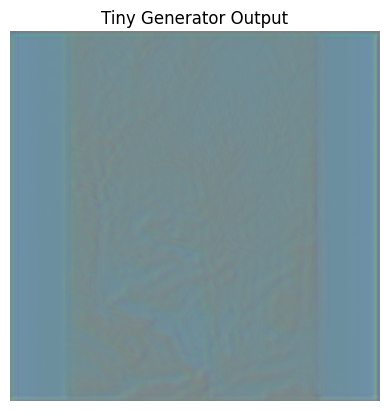

In [15]:
import torch
import torch.nn as nn

# Tiny Generator
class TinyGen(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 7, 1, 3), nn.ReLU(True),
            nn.Conv2d(64, 3, 7, 1, 3), nn.Tanh()
        )
    def forward(self, x): return self.net(x)


from torchvision import transforms as T
from PIL import Image

sample_path = filesA[0]
img = Image.open(sample_path).convert("RGB")
to_tensor = T.Compose([T.Resize((256,256)), T.ToTensor()])
x = to_tensor(img).unsqueeze(0)  # shape [1,3,256,256]


G = TinyGen()
y = G(x)
print("Input shape:", x.shape)
print("Output shape:", y.shape)


to_img = T.ToPILImage()
out_img = to_img((y.squeeze(0)*0.5+0.5).clamp(0,1))
plt.imshow(out_img); plt.title("Tiny Generator Output"); plt.axis("off"); plt.show()
